# Data Analysis: Student Performance

### Objective: 
- A dataset is selected, analyzed, and visualized using Pandas and Matplotlib to answer 2–3 meaningful questions, demonstrating skills in data cleaning, analysis, and storytelling.

### 1. Dataset Selection

### 2. Define Questions

Q1: Does completing a test preparation course affect students' exam performance?

Q2: Are there gender differences in math, reading, and writing scores?

Q3: Is there a relationship between parental education level and student performance?

### 3. Data Exploration & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

Data Exploration:

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


Handle Missing Values:

In [6]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Handle Duplicates:

In [7]:
# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


Handle Incorrect Data Types:

In [8]:
# Convert object columns to category
for col in df.select_dtypes("object").columns:
    if col not in ["gender", "test preparation course", "parental level of education"]:
        df[col] = df[col].astype("category")

In [9]:
# Add a synthetic datetime column for demonstration
date_range = pd.date_range(start="2019-01-01", end="2019-12-31")
df["exam_date"] = np.random.choice(date_range, size=len(df))

### 4. Data Analysis & Visualization

In [10]:
# Create total and average score columns
df["total_score"] = df[["math score", "reading score", "writing score"]].sum(axis=1)
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

In [11]:
# ---------- Q1: Test Preparation Effect ----------

prep_group = df.groupby("test preparation course")[["math score", "reading score", "writing score", "average_score"]].mean()
print("\nAverage scores by test preparation course:")
prep_group


Average scores by test preparation course:


,math score,reading score,writing score,average_score
test preparation course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


In [12]:
# T-test between completed vs none
completed = df[df["test preparation course"] == "completed"]["average_score"]
none = df[df["test preparation course"] == "none"]["average_score"]
tstat, pval = stats.ttest_ind(completed, none, equal_var=False)
print(f"\nT-test: t = {tstat:.3f}, p = {pval:.4f}")


T-test: t = 8.595, p = 0.0000


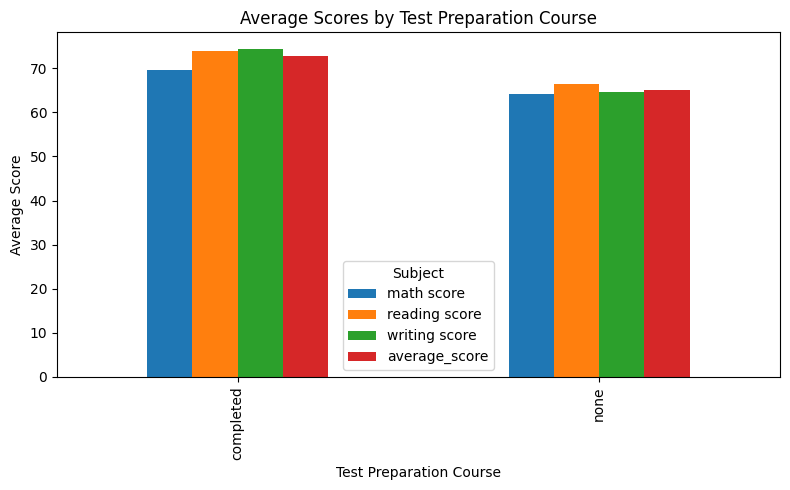

In [13]:
# Bar chart: Average scores by test prep
prep_group.plot(kind="bar", figsize=(8,5))
plt.title("Average Scores by Test Preparation Course")
plt.ylabel("Average Score")
plt.xlabel("Test Preparation Course")
plt.legend(title="Subject")
plt.tight_layout()
plt.show()

In [14]:
# ---------- Q2: Gender Differences ----------

gender_group = df.groupby("gender")[["math score", "reading score", "writing score", "average_score"]].mean()
print("\nAverage scores by gender:")
gender_group


Average scores by gender:


,math score,reading score,writing score,average_score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


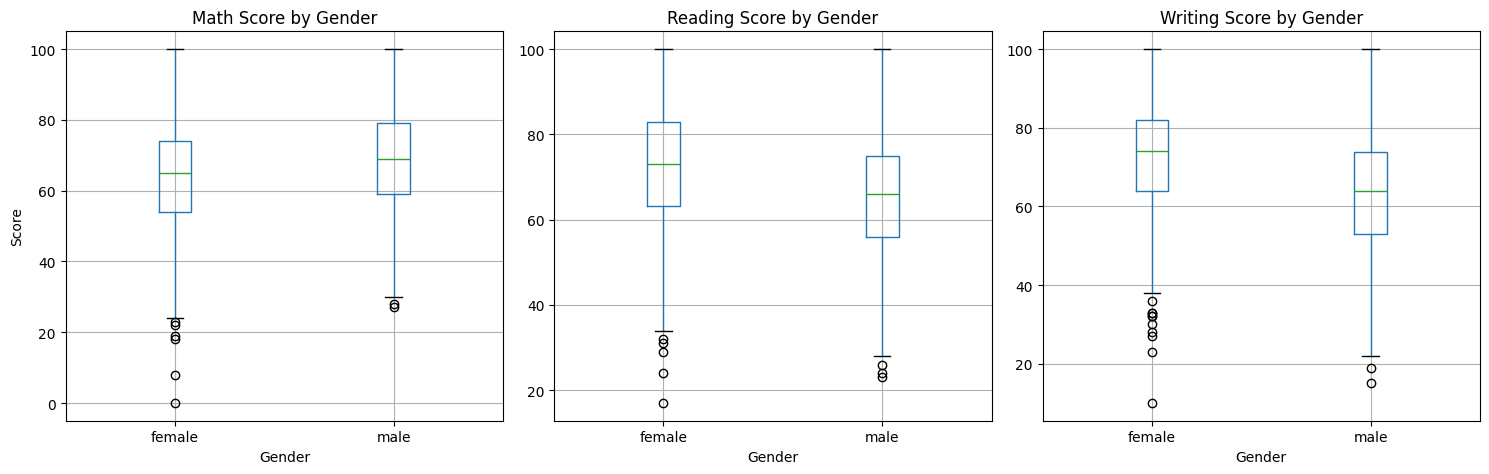

In [15]:
# Boxplots: Score distributions by gender
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Math
df.boxplot(column=["math score"], by="gender", ax=axes[0])
axes[0].set_title("Math Score by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Score")

# Reading
df.boxplot(column=["reading score"], by="gender", ax=axes[1])
axes[1].set_title("Reading Score by Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("")

# Writing
df.boxplot(column=["writing score"], by="gender", ax=axes[2])
axes[2].set_title("Writing Score by Gender")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("")

# Remove default suptitle from pandas
plt.suptitle("")
plt.tight_layout()
plt.show()

In [16]:
# ---------- Q3: Parental Education ----------

parent_group = df.groupby("parental level of education")[["math score", "reading score", "writing score", "average_score"]].mean().sort_values("average_score", ascending=False)
print("\nAverage scores by parental education level:")
parent_group


Average scores by parental education level:


,math score,reading score,writing score,average_score
parental level of education,,,,
master's degree,69.745763,75.372881,75.677966,73.598870
bachelor's degree,69.389831,73.000000,73.381356,71.923729
associate's degree,67.882883,70.927928,69.896396,69.569069
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007
high school,62.137755,64.704082,62.448980,63.096939


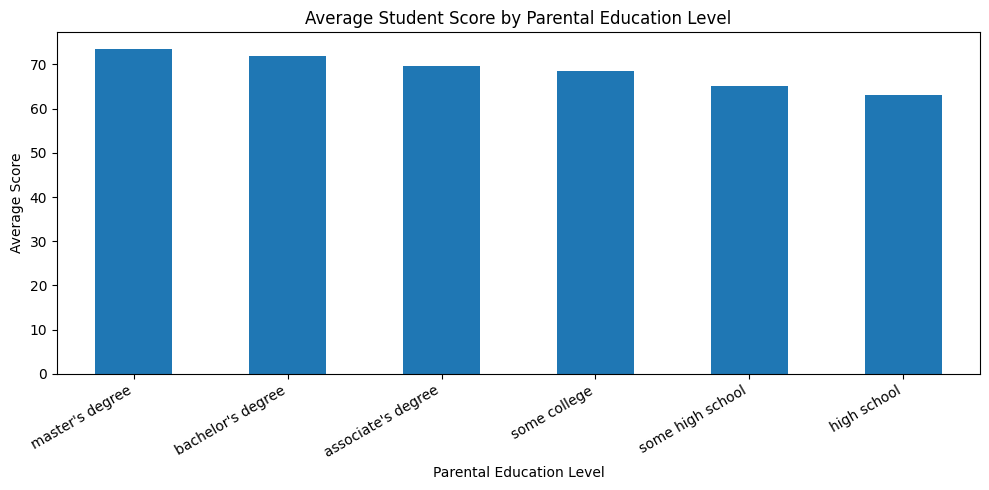

In [17]:
# Bar chart: Average score by parental education
parent_group["average_score"].plot(kind="bar", figsize=(10,5))
plt.title("Average Student Score by Parental Education Level")
plt.ylabel("Average Score")
plt.xlabel("Parental Education Level")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

### 5. Summary & Conclusion

Q1: Test Preparation Effect
 - Students who completed the test preparation course have higher average scores.

Q2: Gender Differences
 - Female has average reading score and writing score more than male, while male has average math score more than female.
 - Female has outliers in each test more than male.

Q3: Parental Education Level
 - Higher parental education levels correspond to higher average scores.

Limitations:
 - Observational dataset (no causal inference).
 - Synthetic exam_date column added for demonstration.